In [50]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [51]:
# All Breweries file
all_breweries = "breweries/AllBreweries.csv"
all_breweriesdf= pd.read_csv(all_breweries) 
all_breweriesdf.head()

,id,name,nameDisplay,abv,isRetired,createDate,updateDate,style.category.name,style.category.createDate,style.name,...,style.ogMax,ibu,available.name,available.description,Brewery,year,style.category.description,style.category.updateDate,Average ABV,Average IBU
0,rf3USP,21A IPA,21A IPA,7.2,N,2012-01-03 02:42:37,2012-03-22 13:04:57,North American Origin Ales,2012-03-21 20:06:45,American-Style India Pale Ale,...,NaN,NaN,NaN,NaN,21st Amendment,NaN,NaN,NaN,NaN,NaN
1,DTJaHy,5 South,5 South,NaN,N,2017-02-21 09:19:08,2017-05-04 15:35:24,North American Origin Ales,2012-03-21 20:06:45,American-Style Pale Ale,...,NaN,NaN,NaN,NaN,21st Amendment,NaN,NaN,NaN,NaN,NaN
2,6IV6lH,563 Stout,563 Stout,5.0,N,2012-01-03 02:42:37,2014-10-13 18:54:48,North American Origin Ales,2012-03-21 20:06:45,American-Style Stout,...,NaN,NaN,NaN,NaN,21st Amendment,NaN,NaN,NaN,NaN,NaN
3,2qPP4k,A Terrible Idea,A Terrible Idea,NaN,N,2018-09-05 17:18:08,2018-09-06 05:00:08,North American Origin Ales,2012-03-21 20:06:45,Juicy or Hazy India Pale Ale,...,1.07,NaN,NaN,NaN,21st Amendment,NaN,NaN,NaN,NaN,NaN
4,8PgW0r,Allies Win The War!,Allies Win The War!,8.5,N,2012-09-09 21:41:10,2015-12-16 17:57:10,British Origin Ales,2012-03-21 20:06:45,Strong Ale,...,NaN,52.0,Limited,Limited availability.,21st Amendment,NaN,NaN,NaN,NaN,NaN


In [52]:
data_points = all_breweriesdf.groupby(["Brewery"]).count()['name'].sort_values(ascending=False)
data_points

Brewery
Stone Brewing                317
Sierra Nevada Brewing Co.    305
Boston Beer Company          193
Lagunitas Brewing Company    104
Anheuser-Busch InBev          94
Anchor Brewing Company        56
21st Amendment                56
Coors Brewing Company         39
Track 7 Brewing Company       35
Grupo Modelo(Corona)          19
Heineken                      16
Miller Brewing Company        11
CCM(Tecate)                   11
White Claw Hard Seltzer        8
Name: name, dtype: int64

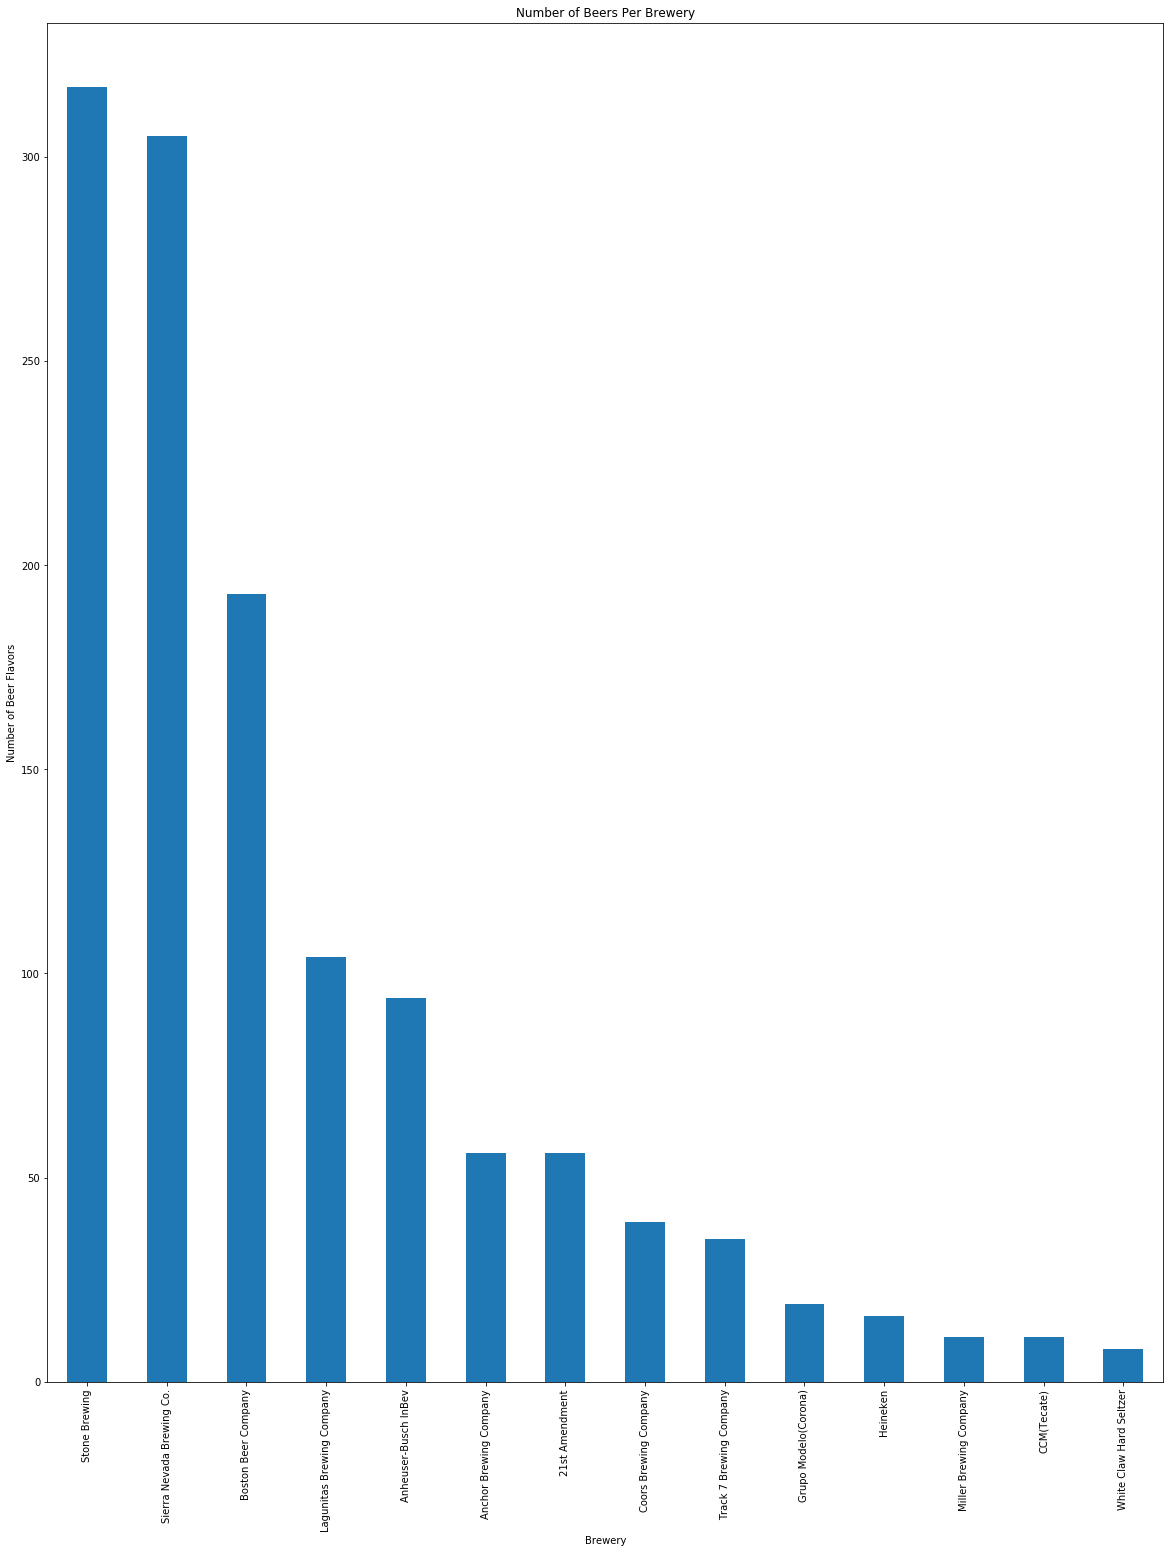

<Figure size 432x288 with 0 Axes>

In [54]:
data_points.plot(kind="bar", figsize=(20,25))

plt.title('Number of Beers Per Brewery')
plt.xlabel('Brewery')
plt.ylabel('Number of Beer Flavors')
plt.savefig('Images/beersperbrewery.png')
plt.show()
plt.tight_layout()


In [5]:
brewery_df = all_breweriesdf.groupby(['Brewery'])

abvMax_mean = brewery_df['style.abvMax'].mean()
ibuMax_mean = brewery_df['style.ibuMax'].mean()

In [6]:
summary_stats = pd.DataFrame({'AbvMax Mean': abvMax_mean, 'IbuMax Mean': ibuMax_mean})
summary_stats

,AbvMax Mean,IbuMax Mean
Brewery,,
21st Amendment,8.547170,55.283019
Anchor Brewing Company,12.136364,67.527273
Anheuser-Busch InBev,8.122222,36.202703
Boston Beer Company,8.301136,47.906977
CCM(Tecate),5.690909,24.545455
Coors Brewing Company,6.194595,25.500000
Grupo Modelo(Corona),9.922222,43.733333
Heineken,5.606667,23.000000
Lagunitas Brewing Company,9.317978,62.842697


## Bar Graph for Average ABV Values

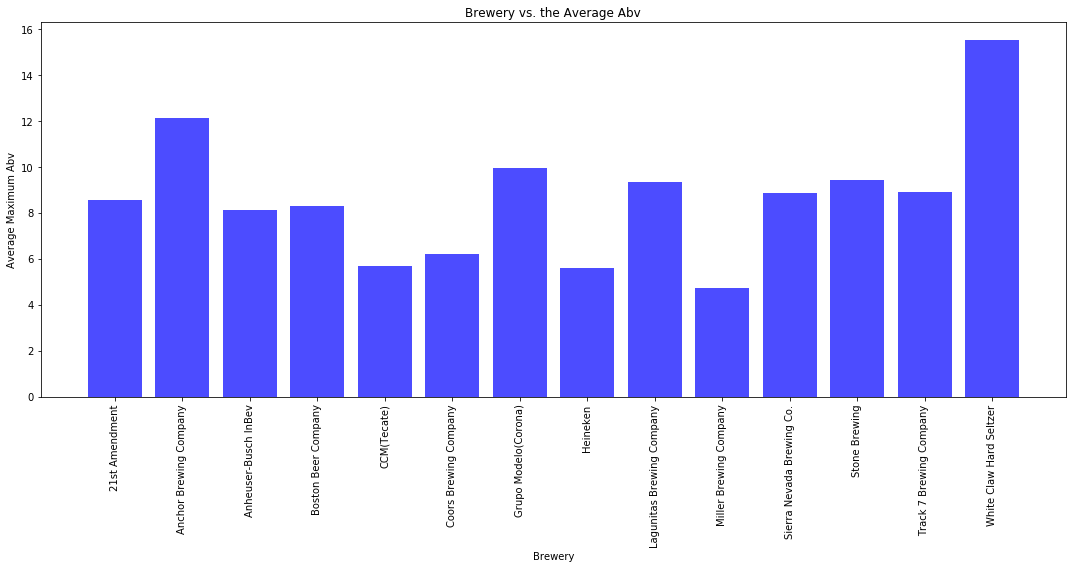

In [7]:
numofpoints=summary_stats["AbvMax Mean"]
x_axis = np.arange(len(numofpoints))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,8))
plt.bar(x_axis, numofpoints, color='blue', alpha=0.7, align='center')
plt.xticks(tick_locations, ["21st Amendment", "Anchor Brewing Company", "Anheuser-Busch InBev", "Boston Beer Company",
                           "CCM(Tecate)", "Coors Brewing Company", "Grupo Modelo(Corona)", "Heineken", "Lagunitas Brewing Company",
                           "Miller Brewing Company", "Sierra Nevada Brewing Co.", "Stone Brewing", "Track 7 Brewing Company", "White Claw Hard Seltzer"], rotation='vertical')
plt.title('Brewery vs. the Average Abv')
plt.xlabel('Brewery')
plt.ylabel('Average Maximum Abv')
plt.tight_layout()
plt.savefig('Images/BreweryvsAbv.png')
plt.show()


## Bar Graph for Average IBU Values

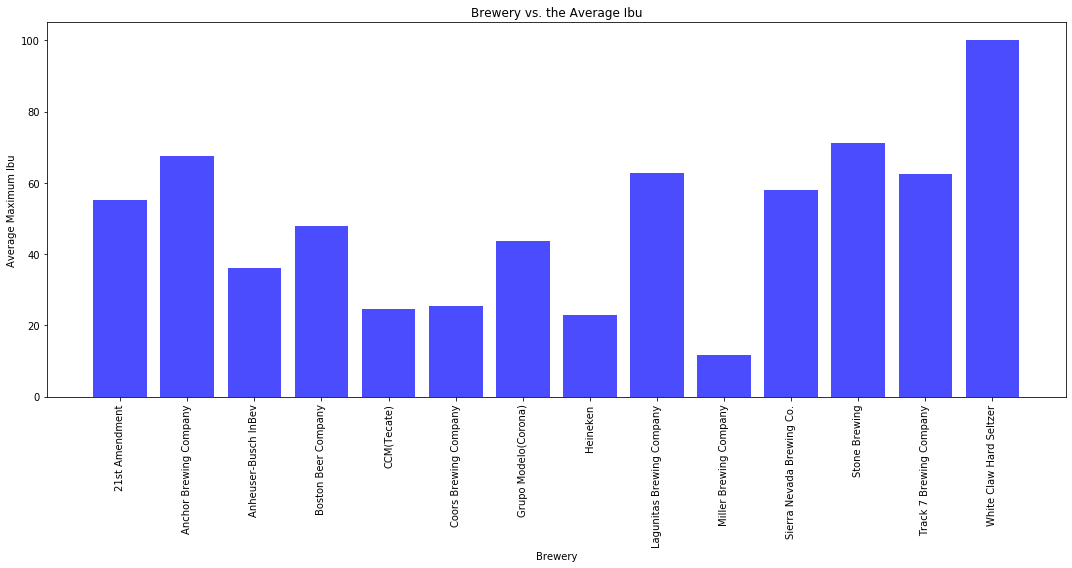

In [8]:
numofpoints=summary_stats["IbuMax Mean"]
x_axis = np.arange(len(numofpoints))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,8))
plt.bar(x_axis, numofpoints, color='blue', alpha=0.7, align='center')
plt.xticks(tick_locations, ["21st Amendment", "Anchor Brewing Company", "Anheuser-Busch InBev", "Boston Beer Company",
                           "CCM(Tecate)", "Coors Brewing Company", "Grupo Modelo(Corona)", "Heineken", "Lagunitas Brewing Company",
                           "Miller Brewing Company", "Sierra Nevada Brewing Co.", "Stone Brewing", "Track 7 Brewing Company", "White Claw Hard Seltzer"], rotation='vertical')
plt.title('Brewery vs. the Average Ibu')
plt.xlabel('Brewery')
plt.ylabel('Average Maximum Ibu')
plt.tight_layout()
plt.savefig('Images/breweryvsIbu.png')
plt.show()


## Scatter Plots
Correlation appears to be strong between IBU level and ABV level.
R value = 0.86...

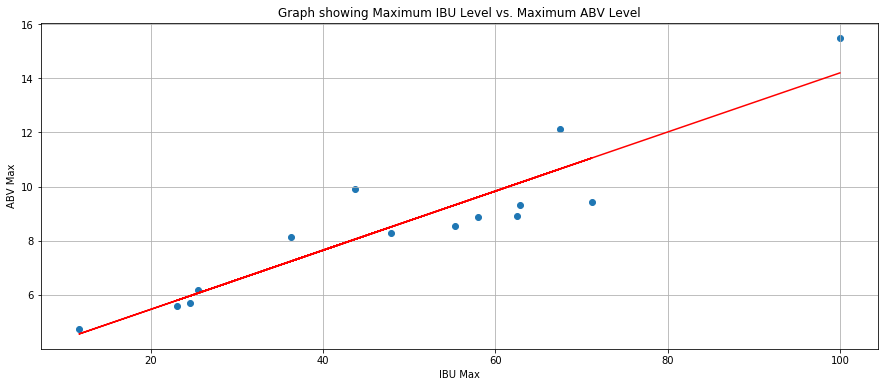

y =0.11x + 3.29
R2 is: 0.8602941227694979


In [9]:
#Scatter Plots
x_values = summary_stats["IbuMax Mean"]
y_values = summary_stats["AbvMax Mean"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,6))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("IBU Max")
plt.ylabel("ABV Max")
plt.title("Graph showing Maximum IBU Level vs. Maximum ABV Level")
plt.grid()
plt.savefig('Images/Scatterplots.png')
plt.show()
print(line_eq)
print(f"R2 is: {rvalue**2}")


## Box Plot For Average ABV Values

In [10]:
# looking at top 4 data with Abv Means

collectn_1 = summary_stats['AbvMax Mean'][1]
collectn_2 = summary_stats['AbvMax Mean'][11]
collectn_3 = summary_stats['AbvMax Mean'][6]
collectn_4 = summary_stats['AbvMax Mean'][13]

data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]
data_to_plot

[12.136363636363638, 9.438283828382838, 9.922222222222224, 15.5]

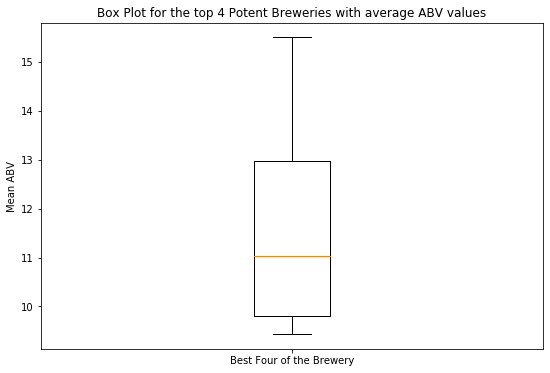

In [11]:
# Creating Box Plots
fig = plt.figure(2, figsize=(9,6))

ax = fig.add_subplot(111)


bp = ax.boxplot(data_to_plot)
ax.set_xticklabels(['Best Four of the Brewery'])
ax.set_ylabel('Mean ABV')
ax.set_title('Box Plot for the top 4 Potent Breweries with average ABV values')
fig.savefig('Images/Abvboxplot.png')

## Box Plot for Average IBU Values

In [12]:
# looking at top 4 data with IBU Means

collectn_1 = summary_stats['IbuMax Mean'][13]
collectn_2 = summary_stats['IbuMax Mean'][1]
collectn_3 = summary_stats['IbuMax Mean'][0]
collectn_4 = summary_stats['IbuMax Mean'][8]

data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]
data_to_plot

[100.0, 67.52727272727273, 55.283018867924525, 62.842696629213485]

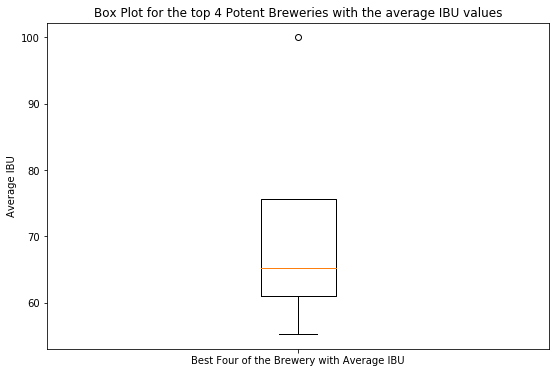

In [13]:
# Creating Box Plots
fig = plt.figure(2, figsize=(9,6))

ax = fig.add_subplot(111)


bp = ax.boxplot(data_to_plot)
ax.set_xticklabels(['Best Four of the Brewery with Average IBU'])
ax.set_ylabel('Average IBU')
ax.set_title('Box Plot for the top 4 Potent Breweries with the average IBU values')
fig.savefig('Images/Ibuboxplot.png')

## Pie Chart for the IsOrganic Question

In [14]:
# CleanBeerData File
clean_beer = "beers/CleanBeerData.csv"
cleanbeer_df = pd.read_csv(clean_beer) 
cleanbeer_df.head()

,id,name,nameDisplay,abv,isOrganic,isRetired,createDate,updateDate,glass.name,style.category.name,...,style.fgMax,style.createDate,style.updateDate,ibu,available.name,year,style.ogMax,srm.name,servingTemperature,style.category.updateDate
0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,N,N,2013-08-19 11:58:12,2018-11-02 02:15:14,Pilsner,North American Lager,...,1.018,2012-03-21 20:06:46,2015-04-07 15:40:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zTTWa2,11.5° PLATO,11.5° PLATO,4.5,N,N,2016-08-09 14:44:42,2018-11-02 02:15:14,NaN,North American Origin Ales,...,NaN,2015-04-07 17:07:27,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN
2,zfP2fK,12th Of Never,12th Of Never,5.5,N,N,2016-08-03 23:25:54,2018-11-02 02:15:14,NaN,North American Origin Ales,...,1.014,2012-03-21 20:06:45,2015-04-07 15:25:18,45.0,Year Round,NaN,NaN,NaN,NaN,NaN
3,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,N,N,2015-04-16 15:44:15,2018-11-02 02:15:14,NaN,British Origin Ales,...,1.016,2012-03-21 20:06:45,2015-04-07 15:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11.0,N,N,2013-02-24 16:31:05,2018-11-02 02:15:14,NaN,North American Origin Ales,...,1.032,2012-03-21 20:06:46,2015-04-07 15:27:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data_value = cleanbeer_df.groupby(["isOrganic"]).count()['name'].sort_values(ascending=False)
data_value

isOrganic
N    3521
Y      81
Name: name, dtype: int64

In [16]:
count = cleanbeer_df["isOrganic"].count()
count

3602

In [17]:
no_count = data_value['N']
yes_count = data_value['Y']

In [18]:
no_percentage = round((no_count / count) * 100, 2)
yes_percentage = round((yes_count / count) * 100, 2)

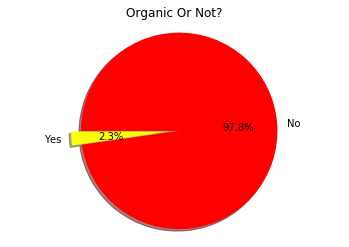

In [19]:
labels = ["Yes", "No"]
sizes = [yes_percentage, no_percentage]
colors = ["Yellow", "Red"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Organic Or Not?")
plt.axis("equal")
plt.savefig("Images/OrganicOrNot.png")


## Top 10 Beer Style

In [20]:
breweries_df = all_breweriesdf.groupby(['style.shortName'])

abvMax_mean = breweries_df['style.abvMax'].mean()
ibuMax_mean = breweries_df['style.ibuMax'].mean()

summary_stylename = pd.DataFrame({'AbvMax Mean': abvMax_mean, 'IbuMax Mean': ibuMax_mean})
summary_stylename
summary_stylename.dropna(how='any')
summary_stylename.sort_values(["AbvMax Mean", "IbuMax Mean"], inplace=True, ascending=[False, False])

ten_best = summary_stylename.head(10)


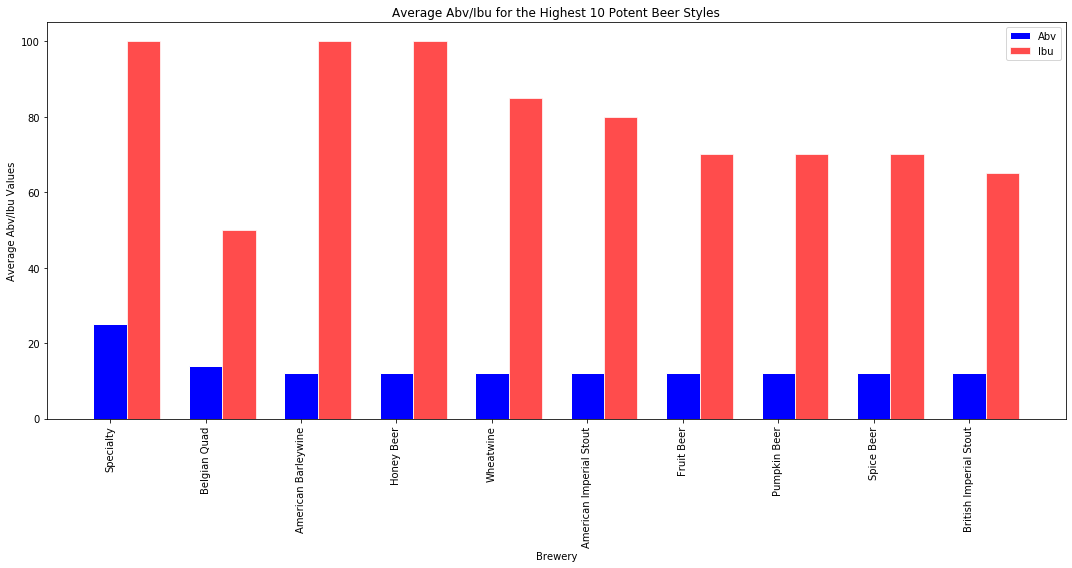

In [21]:
datapoints = ten_best["AbvMax Mean"]
datapoint2 = ten_best["IbuMax Mean"]
x_axis = np.arange(len(datapoints))
barWidth = 0.35
tick_locations = [value for value in x_axis]
tick_location2= [value + barWidth for value in x_axis]
plt.figure(figsize=(15,8))

plt.bar(tick_locations, datapoints, color='blue', width=barWidth, edgecolor='white', label='Abv')
plt.bar(tick_location2, datapoint2, alpha=0.7, color='red', width=barWidth, edgecolor='white', label='Ibu')
plt.xticks(tick_locations,['Specialty', 'Belgian Quad', 'American Barleywine', 'Honey Beer', 'Wheatwine', 'American Imperial Stout', 'Fruit Beer', 'Pumpkin Beer', 'Spice Beer', 'British Imperial Stout'], rotation='vertical')
plt.title('Average Abv/Ibu for the Highest 10 Potent Beer Styles')
plt.xlabel('Brewery')
plt.ylabel('Average Abv/Ibu Values')
plt.tight_layout()
plt.legend()
plt.savefig('Images/Top10BeerStyle.png')
plt.show()

